In [1]:
'''
by Dr. Pingkun Yan at BME @ RPI
The code requires installing opencv
'''

# If you don't have OpenCV yet, run the following command
# in your terminal:
# conda install -c conda-forge opencv

import numpy as np
import matplotlib.pyplot as plt

import cv2 # to import opencv
print(cv2.__version__)

4.1.2


(634, 800)


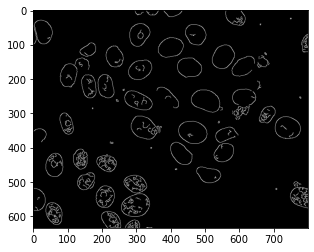

In [2]:
# Load image and detect edges
img = cv2.imread('GFP_06-DAPI.tif', 0)
print(img.shape)

edges = cv2.Canny(img, 30, 75)
plt.imshow(edges, cmap='gray')
plt.show()

In [7]:
# Python: cv2.HoughCircles(image, method, dp, minDist
#                          [, circles[, param1[, param2
#                          [, minRadius[, maxRadius]]]]])
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 20, 
                             param1=50, param2=20,
                             minRadius=10, maxRadius=50)

print(circles.shape)
# print(circles)
circles = np.int32(np.around(circles[0]))

(1, 49, 3)


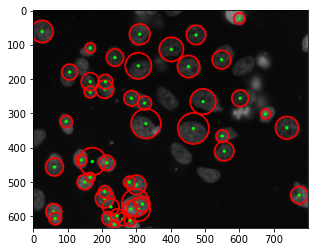

In [8]:
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

for i in circles:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(255,0,0),3) #RGB
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,255,0),5)

cv2.imwrite('img_circles.png', cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))

plt.imshow(cimg)